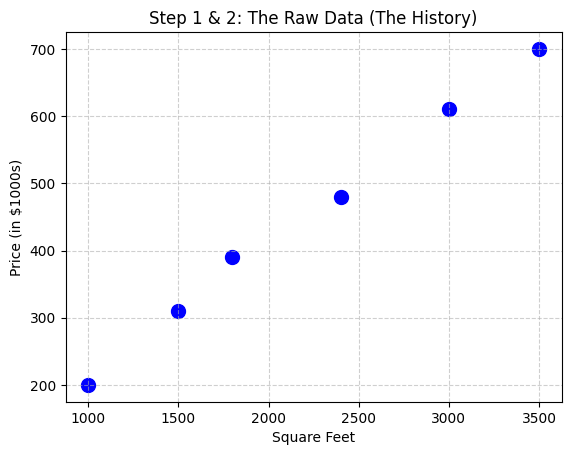

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create the data
data = {'sqft': [1000, 1500, 1800, 2400, 3000, 3500],
        'price': [200, 310, 390, 480, 610, 700]}
df = pd.DataFrame(data)

# 2. Visualize the "Raw Material"
plt.scatter(df['sqft'], df['price'], color='blue', s=100)
plt.title("Step 1 & 2: The Raw Data (The History)")
plt.xlabel("Square Feet")
plt.ylabel("Price (in $1000s)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

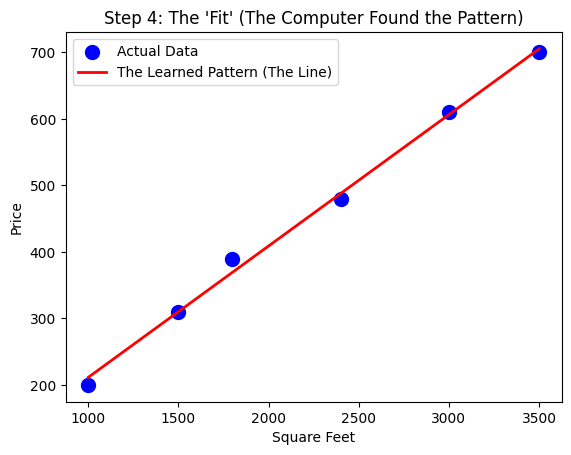

In [2]:
from sklearn.linear_model import LinearRegression
X = df[['sqft']]
y = df['price']

# 3. Create the brain
model = LinearRegression()

# 4. The Learning Step
model.fit(X, y)

# Let's plot the dots AND the line the computer just learned
plt.scatter(X, y, color='blue', s=100, label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='The Learned Pattern (The Line)')
plt.title("Step 4: The 'Fit' (The Computer Found the Pattern)")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.show()

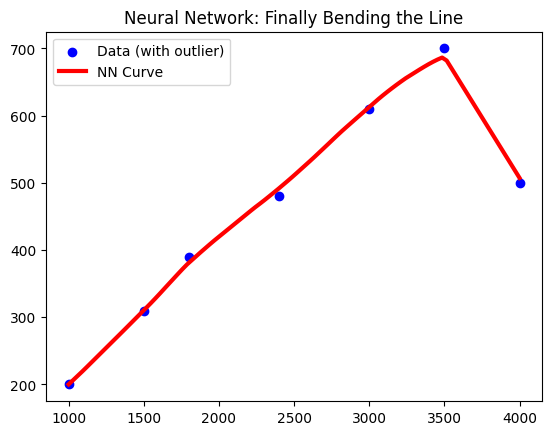

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

# 1. Add a "weird" data point to break the straight line
# A 4000 sqft house that is CHEAPER (maybe it's haunted?)
sqft_new = np.array([1000, 1500, 1800, 2400, 3000, 3500, 4000]).reshape(-1, 1)
price_new = np.array([200, 310, 390, 480, 610, 700, 500])

# 2. SCALING: Neural Networks LOVE small numbers (0 to 1)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(sqft_new)
y_scaled = scaler_y.fit_transform(price_new.reshape(-1, 1)).ravel()

# 3. The Brain: We make it very "flexible" with many neurons
nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=42)
nn.fit(X_scaled, y_scaled)

# 4. Predict a smooth range
x_plot = np.linspace(1000, 4000, 100).reshape(-1, 1)
x_plot_scaled = scaler_X.transform(x_plot)
y_plot_scaled = nn.predict(x_plot_scaled)
y_plot = scaler_y.inverse_transform(y_plot_scaled.reshape(-1, 1))

# 5. Plotting
plt.scatter(sqft_new, price_new, color='blue', label='Data (with outlier)')
plt.plot(x_plot, y_plot, color='red', linewidth=3, label='NN Curve')
plt.title("Neural Network: Finally Bending the Line")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


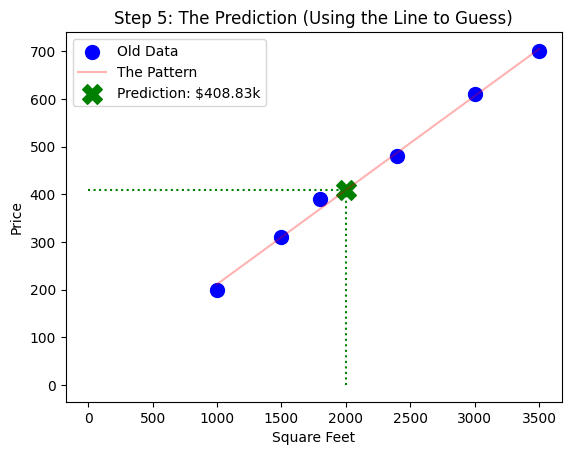

In [4]:
# 5. Make a prediction for a 2000 sqft house
mystery_house = [[2000]]
prediction = model.predict(mystery_house)

# Plot everything again, but add the NEW prediction
plt.scatter(X, y, color='blue', s=100, label='Old Data')
plt.plot(X, model.predict(X), color='red', alpha=0.3, label='The Pattern')

# Plot the new "Mystery House"
plt.scatter(2000, prediction, color='green', marker='X', s=200, label=f'Prediction: ${prediction[0]:.2f}k')

# Draw dashed lines to show how the computer "looked up" the value
plt.vlines(2000, 0, prediction, colors='green', linestyles='dotted')
plt.hlines(prediction, 0, 2000, colors='green', linestyles='dotted')

plt.title("Step 5: The Prediction (Using the Line to Guess)")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.show()

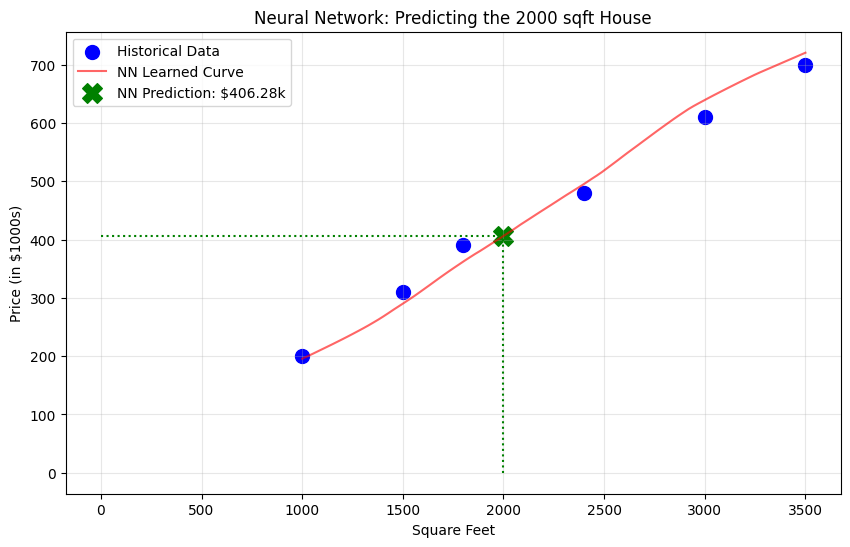

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the Data (Adding the "Mystery House" 2000 sqft)
X = np.array([1000, 1500, 1800, 2400, 3000, 3500]).reshape(-1, 1)
y = np.array([200, 310, 390, 480, 610, 700])

# 2. SCALING: The most important step for Neural Networks
# We scale X (sqft) and y (price) to be small numbers around 0
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 3. Create the "Brain" (Neural Network)
# We use 2 hidden layers with 100 neurons each for a flexible curve
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=5000, random_state=42)
nn_model.fit(X_scaled, y_scaled)

# 4. Predict the Mystery House (2000 sqft)
mystery_house = np.array([[2000]])
mystery_scaled = scaler_X.transform(mystery_house) # Scale it first!
prediction_scaled = nn_model.predict(mystery_scaled)

# Convert the "small number" back into "thousands of dollars"
prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1))[0][0]

# 5. Visualization
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', s=100, label='Historical Data')

# Create a smooth curve for the Neural Network line
X_line = np.linspace(1000, 3500, 100).reshape(-1, 1)
X_line_scaled = scaler_X.transform(X_line)
y_line_scaled = nn_model.predict(X_line_scaled)
y_line = scaler_y.inverse_transform(y_line_scaled.reshape(-1, 1))

plt.plot(X_line, y_line, color='red', alpha=0.6, label='NN Learned Curve')

# Plot the Mystery House Prediction
plt.scatter(2000, prediction, color='green', marker='X', s=200,
            label=f'NN Prediction: ${prediction:.2f}k')

# Draw the lookup lines
plt.vlines(2000, 0, prediction, colors='green', linestyles='dotted')
plt.hlines(prediction, 0, 2000, colors='green', linestyles='dotted')

plt.title("Neural Network: Predicting the 2000 sqft House")
plt.xlabel("Square Feet")
plt.ylabel("Price (in $1000s)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()